*Copyright 2025 Jaeyoung Chun / Winning Twelve*

You may not make copies of this and use or distribute it for any purpose.

# Heat Map

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
df = pd.read_csv("./data/events_pass_simple.csv")

In [3]:
df

,period,team,type,x_start,y_start,x_end,y_end
0,1,South Korea,Pass,60.0,40.0,39.9,29.0
1,1,South Korea,Pass,39.7,30.0,31.9,16.7
2,1,South Korea,Pass,37.4,8.9,49.8,3.6
3,1,South Korea,Pass,42.1,3.4,31.5,3.6
4,1,South Korea,Pass,30.6,4.1,57.7,11.7
...,...,...,...,...,...,...,...
1002,2,South Korea,Pass,94.3,76.4,89.5,78.9
1003,2,South Korea,Pass,88.1,78.2,79.6,76.2
1004,2,South Korea,Pass,79.3,75.4,81.9,72.3
1005,2,Portugal,Pass,38.2,7.8,68.1,12.9


## Filter

### Second Half Only

In [4]:
df = df[ df.period == 2 ]

### South Korea

In [5]:
df_korea = df[ df.team == "South Korea" ]

### Portugal

In [6]:
df_portugal = df[ df.team == "Portugal" ]

## Heat Map

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from mplsoccer import Pitch, VerticalPitch

In [8]:
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", ["red", "black"])

In [9]:
def heatmap(df):
    
    pitch = Pitch(
        pitch_type="statsbomb",
        line_zorder=100,
        pitch_color="grass", stripe=True,
        line_color="white",
    )

    fig, ax = pitch.draw()

    pitch.kdeplot(
        x=df.x_start, y=df.y_start, ax=ax,
        fill=True,
        cmap=custom_cmap
    )

    plt.show()

### South Korea

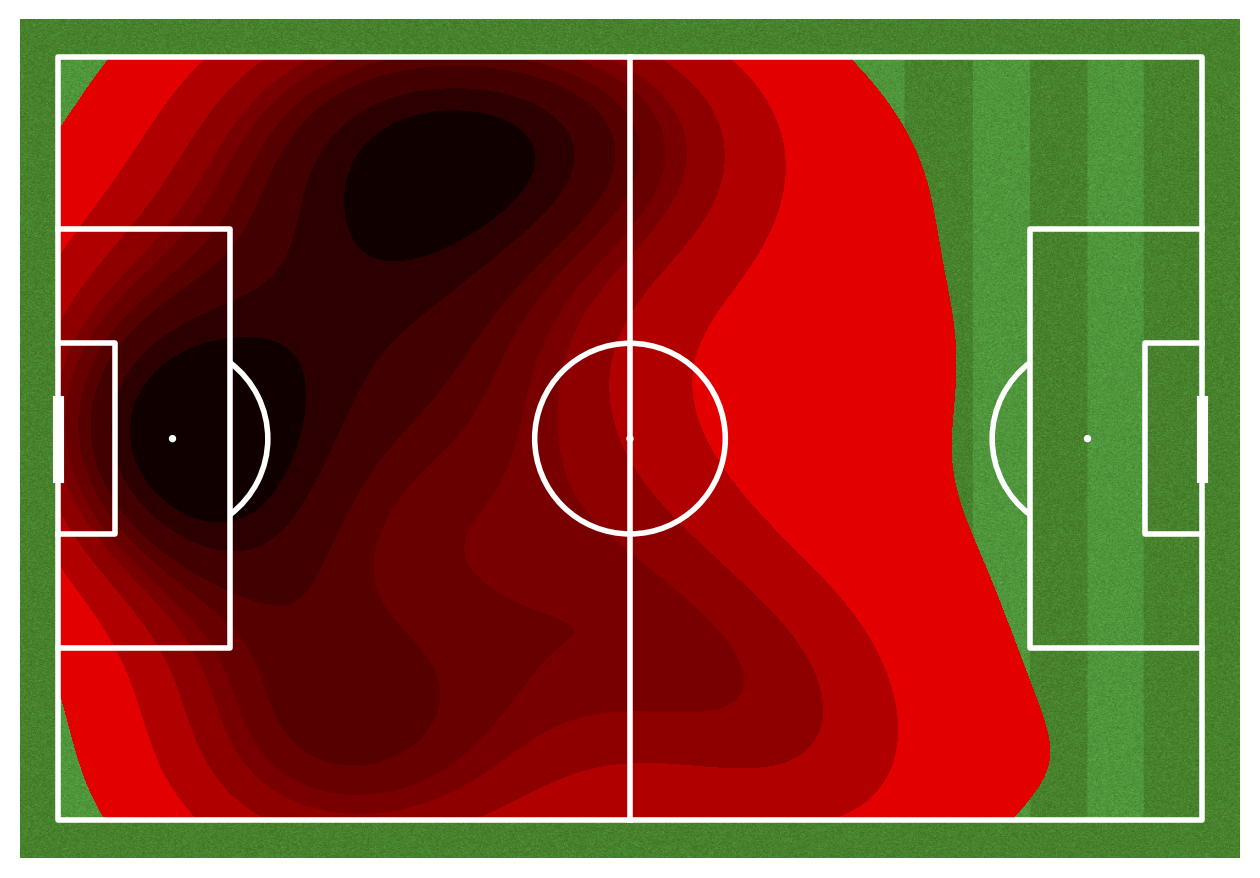

In [10]:
heatmap(df_korea)

### Portugal

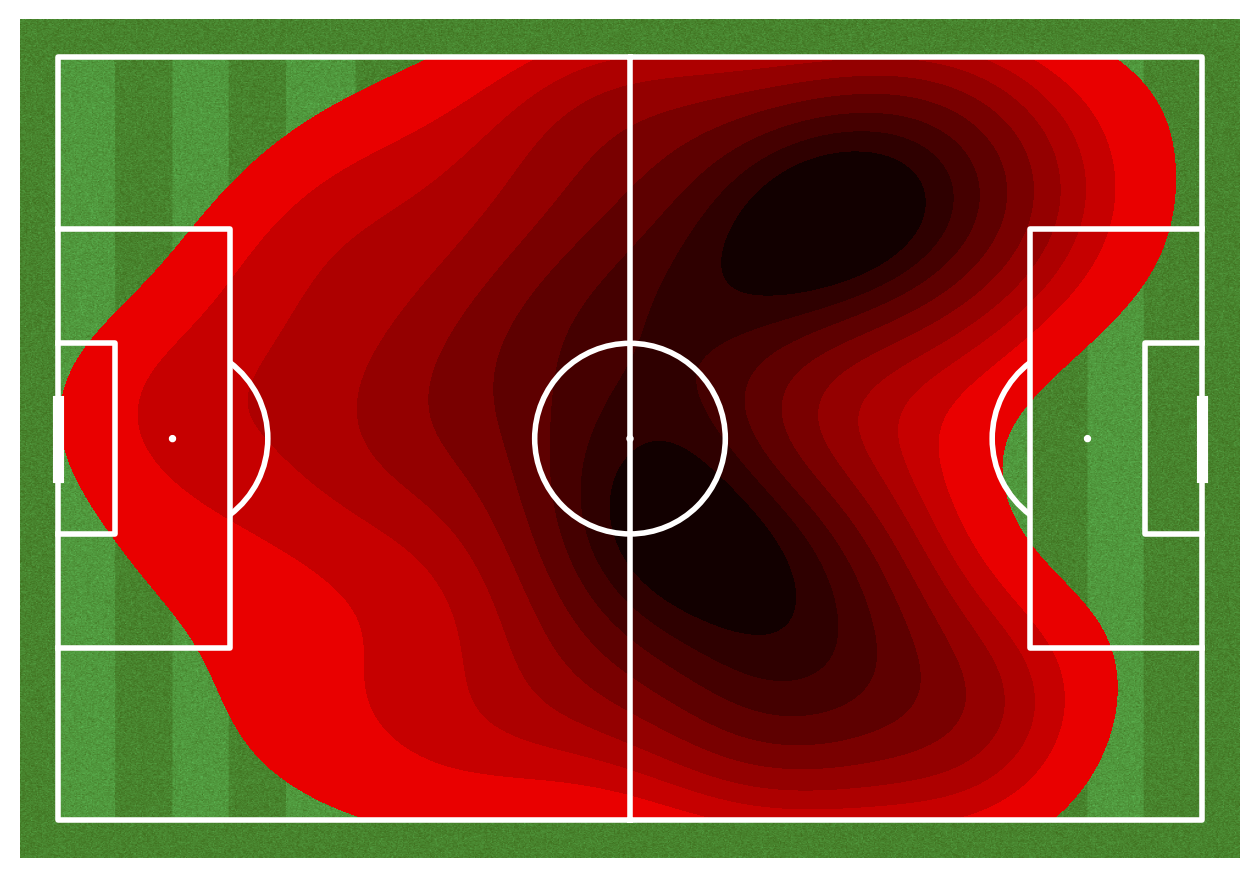

In [11]:
heatmap(df_portugal)

### Both

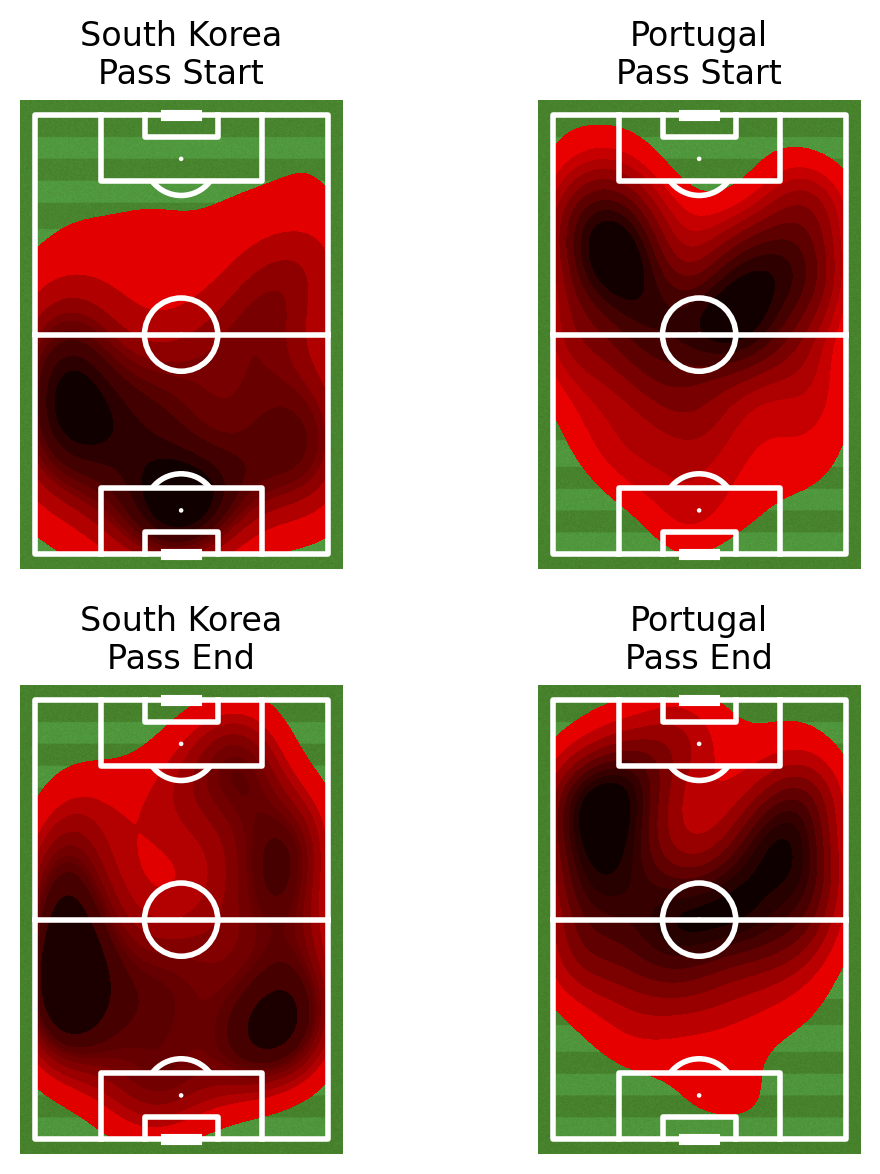

In [12]:
pitch = VerticalPitch(
    pitch_type="statsbomb",
    line_zorder=100,
    pitch_color="grass", stripe=True,
    line_color="white",
)

fig, ax = pitch.draw(nrows=2, ncols=2, figsize=(6, 6))

pitch.kdeplot(
    x=df_korea.x_start, y=df_korea.y_start, ax=ax[0][0],
    fill=True,
    cmap=custom_cmap
)

pitch.kdeplot(
    x=df_portugal.x_start, y=df_portugal.y_start, ax=ax[0][1],
    fill=True,
    cmap=custom_cmap
)

pitch.kdeplot(
    x=df_korea.x_end, y=df_korea.y_end, ax=ax[1][0],
    fill=True,
    cmap=custom_cmap
)

pitch.kdeplot(
    x=df_portugal.x_end, y=df_portugal.y_end, ax=ax[1][1],
    fill=True,
    cmap=custom_cmap
)

for i, country in enumerate(["South Korea", "Portugal"]):
    for j, pos in enumerate(["Pass Start", "Pass End"]):
        ax[j][i].set_title(f"{country}\n{pos}")
# ax[0][0].set_title("South Korea\nPass Start")
# ax[0][1].set_title("Portugal\nPass Start")

plt.tight_layout()
plt.show()